# VAR analysis

##  Import necessary packages

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import read_excel
import statsmodels.tsa.vector_ar.var_model as smvar
from statsmodels.tsa.api import VAR

In [2]:
excel_data= read_excel('GDP.xlsx', '데이터')
excel_data

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,"국내총생산에 대한 지출(원계열, 실질, 분기 및 연간)별",2000 1/4,2000 2/4,2000 3/4,2000 4/4,2001 1/4,2001 2/4,2001 3/4,2001 4/4,2002 1/4,...,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4
0,최종소비지출,141448.1,137589.6,140616.2,146802.0,145599.9,145141.3,149782.0,158641.3,160945.1,...,241697.2,240085.9,238005.1,245128.8,250264.0,249767.8,245956.9,252527.1,259358.5,256463.1
1,민간,114788.2,110820.1,112953.9,117553.3,117998.0,116952.5,119953.0,127119.8,131147.3,...,184490.7,185828.0,180992.2,186778.4,190685.9,192356.2,186147.4,191461.3,195452.5,196000.5
2,가계,111735.8,107909.9,109993.1,114791.8,114723.0,113829.4,116774.3,124180.4,127507.8,...,176111.1,176344.7,172441.7,177493.6,182215.7,182036.7,177362.9,181930.9,186666.7,185881.1
3,가계에 봉사하는 비영리단체,3022.2,2877.2,2926.7,2692.2,3256.5,3092.7,3145.2,2862.1,3618.4,...,8386.6,9488.2,8558.2,9290.8,8480.7,10325.2,8792.1,9537.3,8794.6,10128.8
4,정부,26437.1,26702.0,27647.4,29299.0,27426.7,28111.4,29855.7,31539.5,29592.0,...,57179.3,54281.3,56968.3,58312.2,59538.9,57434.6,59718.8,60984.6,63781.4,60445.3
5,총자본형성,63385.6,75929.1,76956.9,73464.5,61724.2,76061.2,76076.8,79365.0,62884.3,...,133769.1,120572.9,138202.9,134780.1,143814.0,125571.5,136320.9,126925.8,138377.4,116524.6
6,총고정자본형성,60856.9,73084.0,73763.2,75720.1,61098.8,72298.4,74144.8,80220.9,64886.5,...,125717.4,107792.9,130242.1,128404.1,132036.9,111750.8,128569.3,119957.1,127019.9,102377.0
7,총고정자본형성(민간),52900.2,58677.0,59419.2,59237.0,52681.5,57934.4,58892.1,63302.2,56617.6,...,105830.1,96981.8,113403.4,107844.3,110656.2,101174.7,111223.6,100738.0,103779.4,91990.4
8,총고정자본형성(정부),7828.2,14521.6,14448.9,16688.2,8130.4,14531.0,15484.0,17216.8,8024.5,...,19864.2,11044.9,16968.3,20527.1,21337.5,10874.8,17447.9,19173.0,23057.0,10663.1
9,건설투자,30156.4,44279.9,42209.4,45267.7,30735.9,44999.1,46570.6,50072.0,34085.0,...,65086.1,49486.9,67059.8,66978.9,67552.9,50355.4,66069.9,61017.2,63553.9,46608.3


In [3]:
# The type of these data is Series.
conl=excel_data.iloc[1,1:]
gdpl=excel_data.iloc[20,1:]
invstl=excel_data.iloc[7,1:]
exportl=excel_data.iloc[13,1:]

In [4]:
con_gr=conl.pct_change(periods=4)
gdp_gr=gdpl.pct_change(periods=4)
invst_gr=invstl.pct_change(periods=4)
export_gr=exportl.pct_change(periods=4)
#x=pd.DataFrame({'gdp' : gdp_gr[4:],'invest' : invst_gr[4:],'con':con_gr[4:],'export': export_gr[4:]})
x=pd.DataFrame({'gdp' : gdp_gr[4:],'invest' : invst_gr[4:]})

### VAR estimation with an automatic lag selection

In [5]:
# Automatic VAR estimation
#model=smvar.VAR(x)
model = VAR(x)
results=model.fit(4,trend='c')
#results=model.fit(maxlags=4, method='ols', ic='bic',trend='c', verbose=False)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Jul, 2023
Time:                     20:41:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.2863
Nobs:                     69.0000    HQIC:                  -15.6379
Log likelihood:           369.670    FPE:                1.28658e-07
AIC:                     -15.8691    Det(Omega_mle):     1.00680e-07
--------------------------------------------------------------------
Results for equation gdp
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.013728         0.003872            3.545           0.000
L1.gdp            1.031338         0.139399            7.398           0.000
L1.invest        -0.009387         0.045739           -0.205           0.837
L

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [6]:
# Show the selected orders
order=model.select_order(maxlags=4)
print(order)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 2, FPE -> 4, HQIC ->  2>


VAR은 결국 OLS로 한다

### Granger-causality test

In [7]:
# Granger-causality test
gctest=results.test_causality('gdp', 'invest', kind='wald') # kind is either F-test ('f) or Wald test 'wald'
gctest.summary()

Test statistic,Critical value,p-value,df
6.982,9.488,0.137,4


### Impulse response analysis

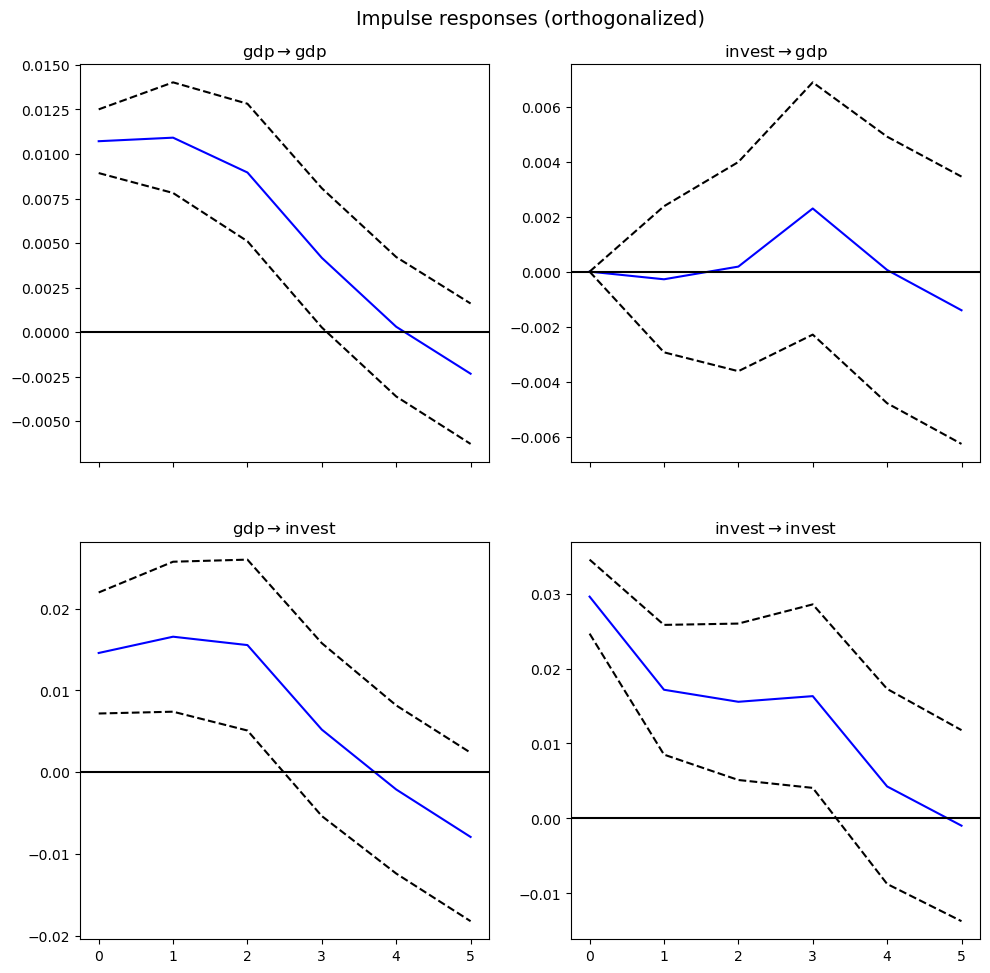

In [13]:
# Impulse response plot
irf = results.irf(5)
irf.plot(orth=True)
plt.show()

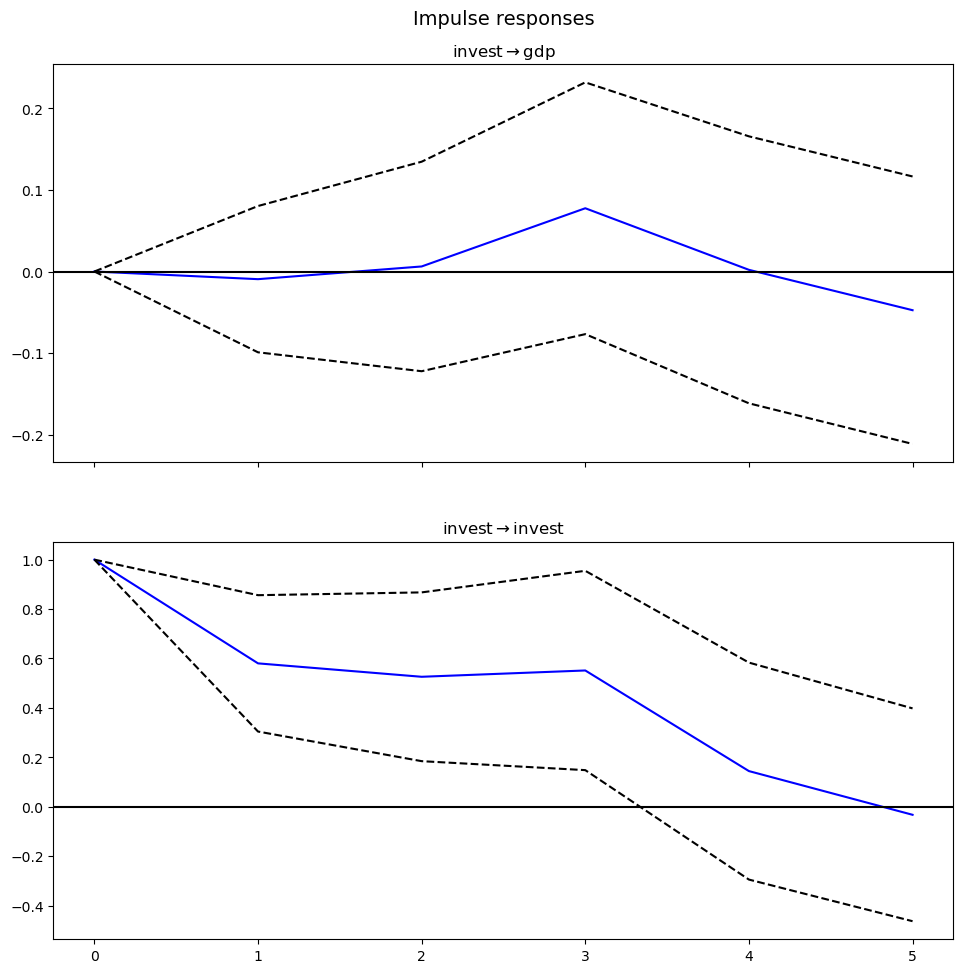

In [14]:
irf.plot(impulse='invest')
plt.show()

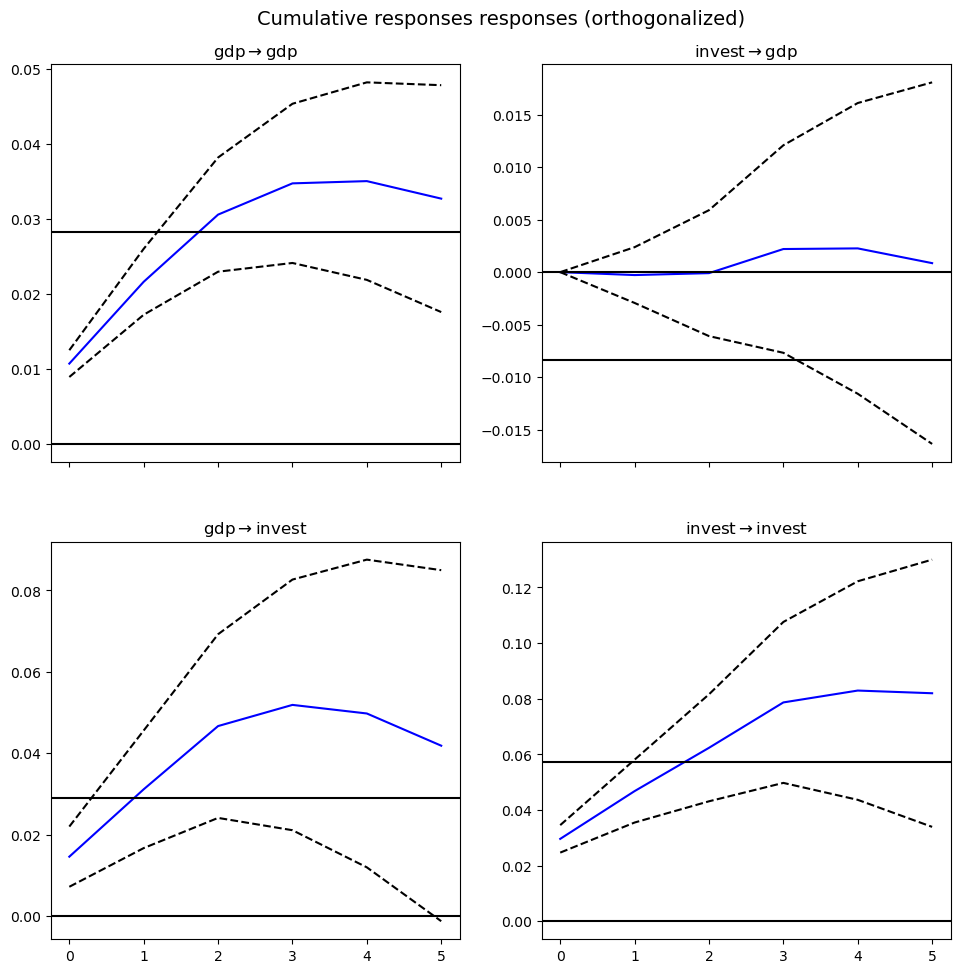

In [15]:
# Plot cumulative impulse responses
irf.plot_cum_effects(orth=True)
plt.show()

### Forecasing error decomposition

In [16]:
# Forecasing error decomposition
fevd = results.fevd(5)
fevd.summary()

FEVD for gdp
          gdp    invest
0    1.000000  0.000000
1    0.999670  0.000330
2    0.999648  0.000352
3    0.984052  0.015948
4    0.984045  0.015955

FEVD for invest
          gdp    invest
0    0.194994  0.805006
1    0.293449  0.706551
2    0.339879  0.660121
3    0.310035  0.689965
4    0.308989  0.691011




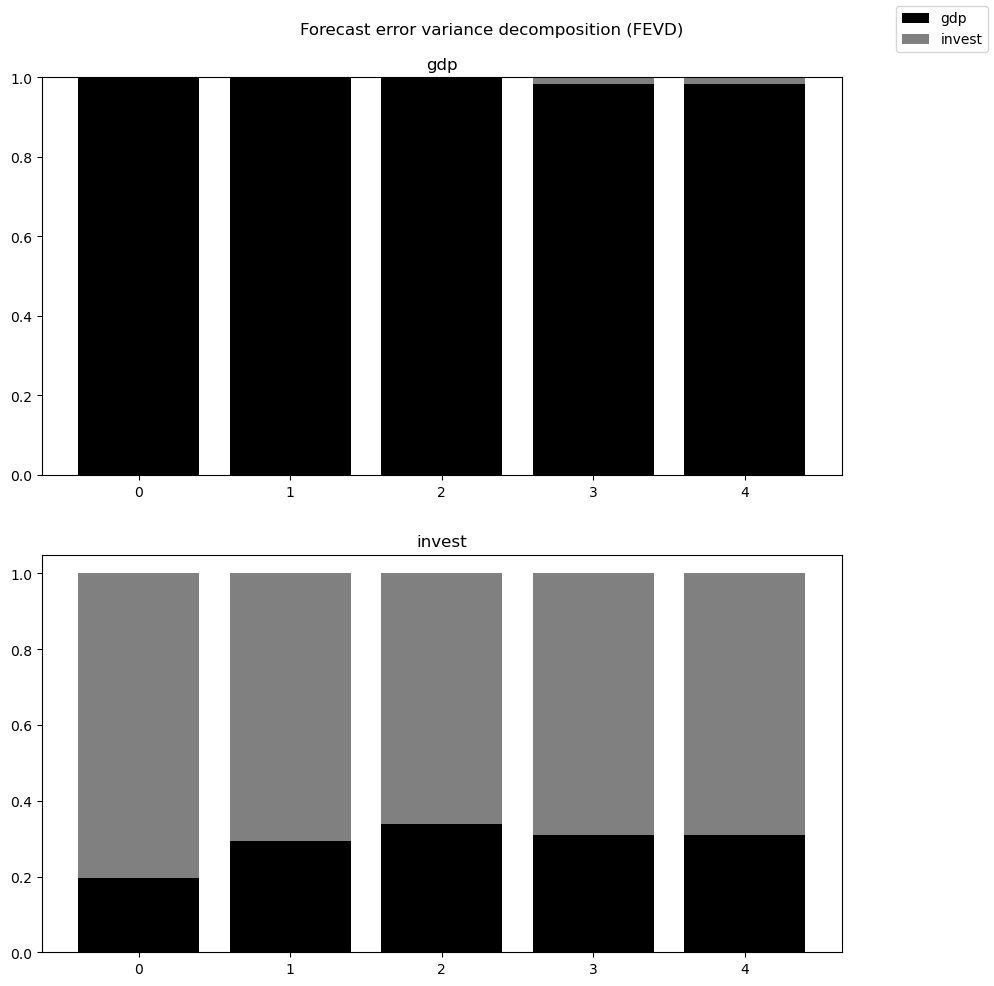

In [17]:
# Plot forecasting error decomposition
results.fevd(5).plot()
plt.show()